In [119]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import seaborn as sns

In [120]:
data = pd.read_csv("car_purchasing.csv",encoding='latin-1')

In [121]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Explorartory Data Analysis

In [122]:
data.shape

(500, 9)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [124]:
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [125]:
data['gender'].value_counts(normalize=True)

1    0.506
0    0.494
Name: gender, dtype: float64

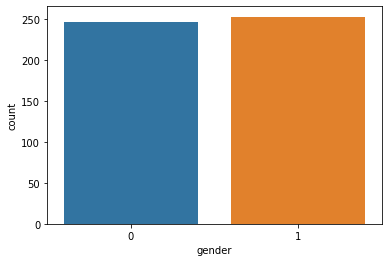

In [126]:
sns.countplot(x=data["gender"])

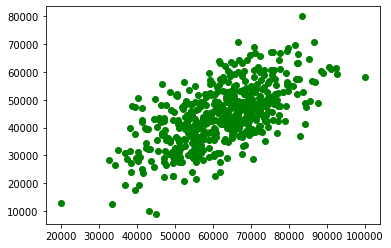

In [127]:
plt.scatter(data['annual Salary'], data['car purchase amount'], color= "green")

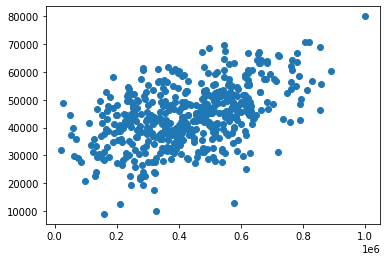

In [128]:
plt.scatter(data['net worth'], data['car purchase amount'])

## Data Preprocessing

In [129]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [130]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [131]:
data.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
credit card debt,0.028882
net worth,0.488580
annual Salary,0.617862
age,0.632865
car purchase amount,1.000000


In [132]:
#defining independent features
ind_cols = ['age','gender','annual Salary', 'credit card debt', 'net worth']

## Splitting into features and target

In [133]:
x=data[ind_cols]
y=data['car purchase amount']

## Converting categorical values into one hot encoding

In [134]:
x=pd.get_dummies(x)

## Splitting the data into train and test

In [135]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.15,
                                                    random_state=32)

## ANN Model

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [137]:
x_train.shape, y_train.shape

((425, 5), (425,))

## Model 1

In [63]:
ann_seq = Sequential() #model
# hidden layers
ann_seq.add(Dense(32, activation = "relu",input_shape = (5,)))
ann_seq.add(Dense(16, activation = "relu"))
ann_seq.add(Dense(8, activation = "relu"))
ann_seq.add(Dense(1, activation = None))
#summary 
ann_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                192       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [138]:
ann_seq.compile(optimizer="adam",metrics = ['mse'], loss = "mean_squared_error")

In [139]:
epochs = 20
batch_size = 64

ann_seq.fit(x_train, y_train , epochs = epochs, batch_size= batch_size)

Epoch 1/20
7/7 [==============================] - 0s 3ms/step - loss: 52395540.0000 - mse: 52395540.0000
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 46662852.0000 - mse: 46662852.0000
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 49194404.0000 - mse: 49194404.0000
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 46514460.0000 - mse: 46514460.0000
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 45418596.0000 - mse: 45418596.0000
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 44989360.0000 - mse: 44989360.0000
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 44924028.0000 - mse: 44924028.0000
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 46890168.0000 - mse: 46890168.0000
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 45624996.0000 - mse: 45624996.0000
Epoch 10/20
7/7 [==============================] - 0s 3

In [140]:
y_pred = ann_seq.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [141]:

from sklearn.metrics import mean_squared_error

In [142]:
mean_squared_error(y_test, y_pred)

51651026.27770504

In [143]:
ann_seq.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 51651032.0000 - mse: 51651032.0000


[51651032.0, 51651032.0]

## model2 

6 hidden layers, 64-neurons, epcohs = 50 

In [144]:
model2 = Sequential()
model2.add(Dense(64, activation = "relu", input_shape = (5,)))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                384       
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 1)                

In [145]:
model2.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [146]:
history1 = model2.fit(x_train , y_train , epochs = 20, batch_size = 64,
           validation_split = 0.1)

Epoch 1/20
6/6 [==============================] - 1s 38ms/step - loss: 648267904.0000 - mse: 648267904.0000 - val_loss: 322850400.0000 - val_mse: 322850400.0000
Epoch 2/20
6/6 [==============================] - 0s 12ms/step - loss: 245692176.0000 - mse: 245692176.0000 - val_loss: 163017248.0000 - val_mse: 163017248.0000
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 198330976.0000 - mse: 198330976.0000 - val_loss: 146937696.0000 - val_mse: 146937696.0000
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 171986432.0000 - mse: 171986432.0000 - val_loss: 149561872.0000 - val_mse: 149561872.0000
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 142098768.0000 - mse: 142098768.0000 - val_loss: 116305952.0000 - val_mse: 116305952.0000
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 112897680.0000 - mse: 112897680.0000 - val_loss: 104706704.0000 - val_mse: 104706704.0000
Epoch 7/20
6/6 [======================

In [147]:
y_pred = model2.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [148]:
mean_squared_error(y_test, y_pred)

52039092.56724037

In [149]:
history1.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [150]:
import matplotlib.pyplot as plt

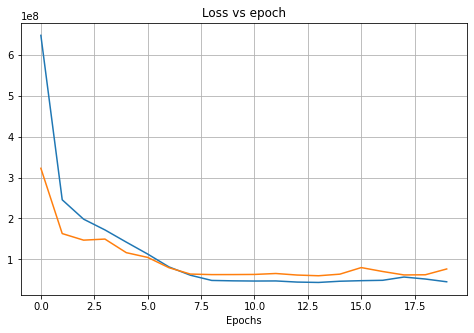

In [151]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history1.history['loss'], label = "Training loss")
ax.plot(history1.history['val_loss'], label = "validation loss")
ax.set_title("Loss vs epoch")
ax.set_xlabel("Epochs")
ax.grid()
plt.show()

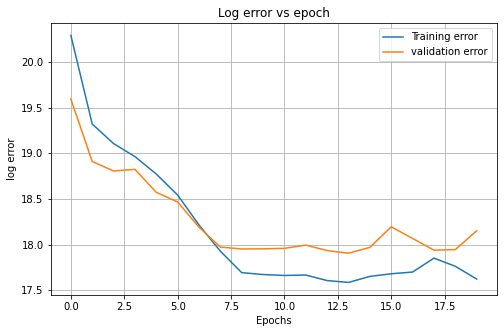

In [152]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['mse']), label = "Training error")
ax.plot(np.log(history1.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()

## Model 3

In [153]:
model3 = Sequential()
model3.add(Dense(128, activation = "relu", input_shape = (5,)))
model3.add(Dense(128, activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(1, activation = None))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               768       
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 1)                

In [154]:
model3.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [155]:
history2= model2.fit(x_train , y_train , epochs = 20, batch_size = 64,
           validation_split = 0.1)

Epoch 1/20
6/6 [==============================] - 0s 16ms/step - loss: 46324184.0000 - mse: 46324184.0000 - val_loss: 63656852.0000 - val_mse: 63656852.0000
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 44476872.0000 - mse: 44476872.0000 - val_loss: 63655524.0000 - val_mse: 63655524.0000
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 42745964.0000 - mse: 42745964.0000 - val_loss: 63398196.0000 - val_mse: 63398196.0000
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 43044916.0000 - mse: 43044916.0000 - val_loss: 65261236.0000 - val_mse: 65261236.0000
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 44999708.0000 - mse: 44999708.0000 - val_loss: 59738560.0000 - val_mse: 59738560.0000
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 45537764.0000 - mse: 45537764.0000 - val_loss: 60318852.0000 - val_mse: 60318852.0000
Epoch 7/20
6/6 [==============================] - 0s 7ms/step 

In [156]:
y_pred = model2.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [157]:
mean_squared_error(y_test, y_pred)

48809005.66662997

In [158]:
history2.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [159]:
import matplotlib.pyplot as plt

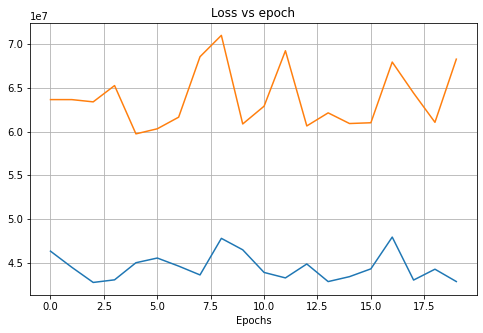

In [160]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history2.history['loss'], label = "Training loss")
ax.plot(history2.history['val_loss'], label = "validation loss")
ax.set_title("Loss vs epoch")
ax.set_xlabel("Epochs")
ax.grid()
plt.show()

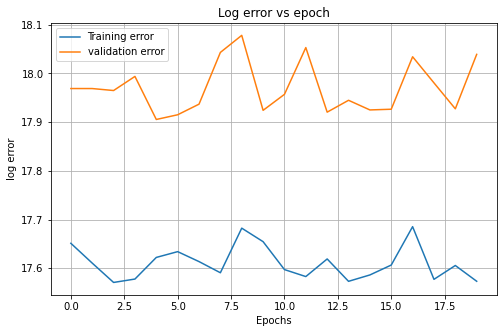

In [161]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history2.history['mse']), label = "Training error")
ax.plot(np.log(history2.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()